In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('copper-new.txt', delimiter= '\s+', header=None)
data.head()

,0,1
0,0.591,24.41
1,4.703,54.98
2,9.470,89.57
3,11.615,114.26
4,12.970,133.61


In [3]:
x=np.array(data.iloc[:, 1]).reshape(-1,1)
y=np.array(data.iloc[:, 0])

#transform polynomial data
x= PolynomialFeatures(degree=4, include_bias=False).fit_transform(x)
print(x[:5,:])

[[2.44100000e+01 5.95848100e+02 1.45446521e+04 3.55034958e+05]
 [5.49800000e+01 3.02280040e+03 1.66193566e+05 9.13732226e+06]
 [8.95700000e+01 8.02278490e+03 7.18600843e+05 6.43650776e+07]
 [1.14260000e+02 1.30553476e+04 1.49170402e+06 1.70442101e+08]
 [1.33610000e+02 1.78516321e+04 2.38515656e+06 3.18680769e+08]]


In [4]:
alpha_range = np.linspace(0.000001,0.00001,10)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_error=[]
for i in alpha_range:
    MSE = []
    for train_index, test_index in cv.split(x):
        x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
        ridgereg = Ridge(alpha=i,normalize=True)
        ridgereg.fit(x_train, y_train)
        y_pred=ridgereg.predict(x_test)
        MSE.append(mean_squared_error(y_test, y_pred))
    cv_error.append(np.mean(MSE))

In [5]:
#scores = []
#alpha_range = np.linspace(1,10,10)
#print(alpha_range)
#for i in alpha_range:
    #ridgereg = Ridge(alpha=i,normalize=True)
    #scores.append(np.mean(cross_val_score(ridgereg, x, y, cv=5,)))

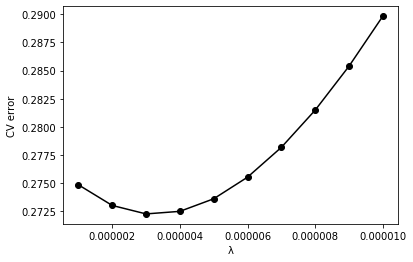

In [6]:
plt.figure
plt.plot(alpha_range, cv_error, '-ok')
plt.xlabel('λ')
plt.ylabel('CV error')
plt.show()

In [7]:
optimal_alpha = alpha_range[cv_error.index(min(cv_error))]
print('Optimal Alpha is:',optimal_alpha )


Optimal Alpha is: 3e-06


In [8]:
x_pred = np.array([400]).reshape(-1,1)
x_pred = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_pred)
print(x_pred)

[[4.00e+02 1.60e+05 6.40e+07 2.56e+10]]


In [9]:
ridgereg = Ridge(alpha=optimal_alpha,normalize=True)
#cv = KFold(n_splits=5, random_state=42, shuffle=True)
y_pred=[]
for train_index, test_index in cv.split(x):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    ridgereg.fit(x_train, y_train)
    y_pred.append(float(ridgereg.predict(x_pred)))
print('coefficient is:', np.mean(y_pred))

coefficient is: 17.525025586824103
